In [2]:
%matplotlib qt
import matplotlib.pyplot as plt 
import numpy as np
import mpl_interactions as pli
from read_in_data import load_itk

### Load in the data files

In [4]:
ggems_image, origin, space = load_itk('scatter.mhd') # What is this in? - Should be MeV as well according to didier
ogate_image, origin, space = load_itk('scatter-scatter.mhd') # This is in MeV, MeV per particle? - I don't believe so

# ggems_stats, origin, space = load_itk('out/ggems_dosimetry_uncertainty.mhd') # What is this in? - Should be MeV as well according to didier
# ogate_stats, origin, space = load_itk('out/gate_edep_uncertainty.mhd') # This is in MeV, MeV per particle? - I don't believe so

### A side by side view (log energy deposition in MeV)

In [6]:
# Define the variables
crop = 75

a = c = crop
b = d = -crop

log_ggems = np.log(np.flipud(ggems_image.transpose(2,1,0))[:,a:b,c:d]+1)
log_gate = np.log(ogate_image[:,a:b,c:d]+1)

ggems = np.flipud(ggems_image.transpose(2,1,0))[:,a:b,c:d]
ogate = ogate_image[:,a:b,c:d]

# stats_ggems = np.flipud(ggems_stats.transpose(2,1,0))[:,a:b,c:d]
# stats_ogate = ogate_stats[:,a:b,c:d]

# Normalize the logarithmic arrays by the mean of the central 4 columns
log_ggems_norm = (log_ggems - np.mean(log_ggems[:,24:26,24:26]))/np.std(log_ggems[:,24:26,24:26]) + 1
log_gate_norm = (log_gate - np.mean(log_gate[:,24:26,24:26]))/np.std(log_gate[:,24:26,24:26]) + 1

/home/jericho/anaconda3/envs/tigre_fastcat/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jericho/anaconda3/envs/tigre_fastcat/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/jericho/anaconda3/envs/tigre_fastcat/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/jericho/anaconda3/envs/tigre_fastcat/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/jericho/anaconda3/envs/tigre_fastcat/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


### Make the logarithmic comparison between gate and ggems 

libGL error: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: radeonsi
libGL error: MESA-LOADER: failed to open radeonsi: /usr/lib/dri/radeonsi_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: radeonsi
libGL error: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: swrast


IndexError: index -1 is out of bounds for axis 0 with size 0

In [44]:
# save as a gif
anim = controls.save_animation("ggem_gate_z_profiles.gif", fig, "axis0", interval=350)

### Look at profiles through the thing

In [4]:
ind=20

ggem_norm_img = np.log(np.mean(ggems,axis=0)+1)
gate_norm_img = np.log(np.mean(ogate,axis=0)+1)

ggem_norm_img /= ggem_norm_img[25,25]
gate_norm_img /= gate_norm_img[25,25]

fig, axes = pli.heatmap_slicer(
    np.arange(ggems.shape[1]),
    np.arange(ogate.shape[1]),
    (ggem_norm_img,gate_norm_img),
    slices="both",
    heatmap_names=("ggems", "gate"),
    labels=("x-pixels", "y-pixels"),
    interaction_type="move",
    cmap='viridis',
    figsize=[10,4],
)
plt.ylabel('Normalized log(Edep+1)')
plt.tight_layout()

### Now lets look at the PDD

In [34]:
# Make a histogram of the difference
plt.figure()
plt.hist(diff_plot.flatten(),bins=100)
plt.xlabel('Gate Values relative to GGEMS [%]')
plt.ylabel('Number of Voxels')
plt.title('Histogram of Gate Values relative to GGEMS')

Text(0.5, 1.0, 'Histogram of Gate Values relative to GGEMS')

### Looking at the dose on the CAX

In [40]:
# Make a plot showing the difference in the central 4 columns

# Make xvalues in mm
xvalues = np.arange(40)*0.1

vals = np.mean(stats_ogate[:,24:26,24:26],axis=(1,2))
# Define a CAX dose profile
ggems_cax = np.mean(ggems[:,24:26,24:26],axis=(1,2))
ogate_cax = np.mean(ogate[:,24:26,24:26],axis=(1,2))
# Define standard deviation of CAX dose profile
ggems_cax_std = np.mean(stats_ggems[:,24:26,24:26],axis=(1,2))
ogate_cax_std = np.mean(stats_ogate[:,24:26,24:26],axis=(1,2))

plt.figure()
# plot the mean dose in the central 4 columns with error bars
plt.errorbar(xvalues,ggems_cax,yerr=ggems_cax*(0.001 + ggems_cax_std),label='GGEMS')
plt.errorbar(xvalues,ogate_cax,yerr=ogate_cax*(0.001 + ogate_cax_std),label='Gate')

plt.xlabel('z [mm]')
plt.ylabel('Mean Dose [MeV]')
plt.legend()
plt.title('Mean Dose in CAX')

Text(0.5, 1.0, 'Mean Dose in CAX')

### Now looking at the dose in the whole detector

In [23]:
xvalues = np.arange(40)*0.1

# Make a plot over the mean of the whole array
plt.figure()
# plot the mean dose in the whole array with error bars
plt.plot(xvalues,np.mean(ggems,axis=(1,2)),label='GGEMS')
plt.plot(xvalues,np.mean(ogate,axis=(1,2)),label='Gate')

plt.xlabel('z [mm]')
plt.ylabel('Mean Dose [MeV]')
plt.legend()
plt.title('Mean Dose in Whole Array')

Text(0.5, 1.0, 'Mean Dose in Whole Array')

### Slice midway through the phantom

In [6]:
ind=20

fig, axes = pli.heatmap_slicer(
    np.arange(log_gate.shape[1]),
    np.arange(log_ggems.shape[1]),
    (log_gate[ind],log_ggems[ind]),
    slices="both",
    heatmap_names=("gate", "ggems"),
    labels=("Some wild X variable", "Y axis"),
    interaction_type="move",
    cmap='jet',
    figsize=[10,4]
)

<IPython.core.display.Javascript object>


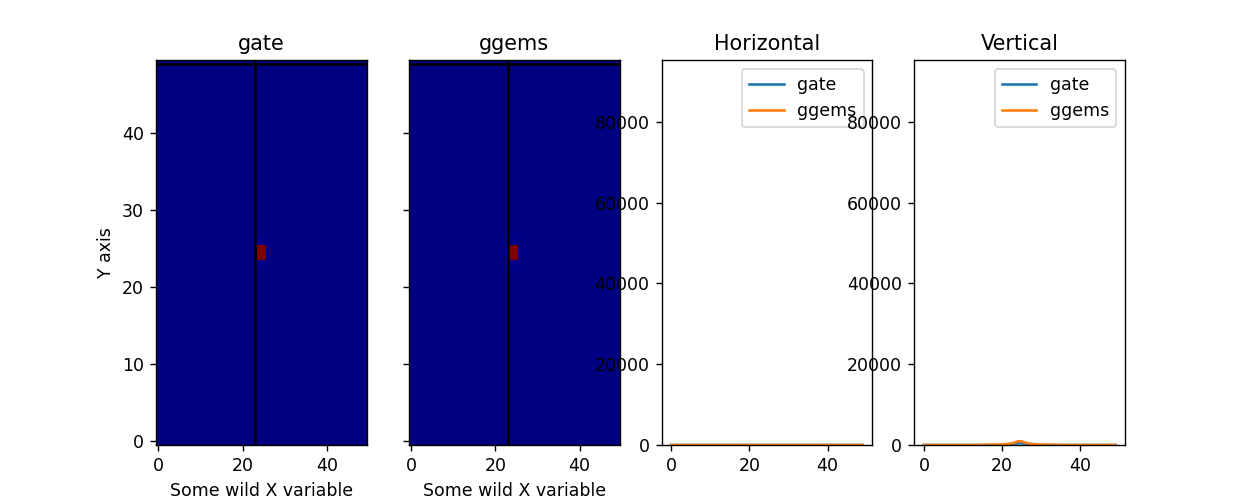

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [37]:
ind=20

fig, axes = pli.heatmap_slicer(
    np.arange(log_gate.shape[1]),
    np.arange(log_ggems.shape[1]),
    (ogate[ind],ggems[ind]),
    slices="both",
    heatmap_names=("gate", "ggems"),
    labels=("Some wild X variable", "Y axis"),
    interaction_type="move",
    cmap='jet',
    figsize=[10,4],
)
ogate_image[:,a:b,c:d]